# <center>Organizaci&oacute;n de Datos</center>
## <center>Trabajo Práctico 1 : Reservas de Hotel</center>
## <center>Checkpoint 1</center>
### <center> </center>

#### Integrantes grupo 19: Sudanalytics 
* Adrian Leandro Re
* Alan Toulouse
* Luciano Lorenzo 108951

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Cargamos 3 data frames, el de todos los registros, y dos que nos servirán para analizar las demás columnas en función del **target** (`is_canceled`).

In [2]:
df  = pd.read_csv("./dataset/hotels_train.csv")
df_cancelado = df[df.is_canceled == 1]
df_no_cancelado = df[df.is_canceled == 0]
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,9.0,NaN,0,Transient,115.5,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,NaN,0,Transient,42.0,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,9.0,NaN,0,Transient,229.0,0,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,154.0,NaN,0,Transient,75.0,0,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,20.0,NaN,0,Transient-Party,75.0,0,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


In [3]:
df['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.50025
1    0.49975
Name: proportion, dtype: float64

Lo primero a tener en cuenta en el dataset de entrenamiento es que (casi) la mitad de los registros son de cancelaciones y la otra mitad no. Esto nos dice que al analizar independientemente una variable, esta no va a tener **individualmente** una relación con la cancelación de la reservación si tiene mitad de registros de cancelaciones y la otra mitad no cancelaciones.

Esto no quiere decir necesariamente que la mitad de las reservaciones fueron canceladas, sino más bien que fueron seleccionadas para que haya la misma cantidad de registros de ambas para su análisis.

# Variables

1. **Hotel**: variable categórica que nos dice en que hotel fue hecha la reserva. Los posibles valores que puede tomar son:
    - City Hotel
    - Resort Hotel. 

No presenta valores faltantes.

Text(0.5, 1.0, 'cantidad de reservas por hotel')

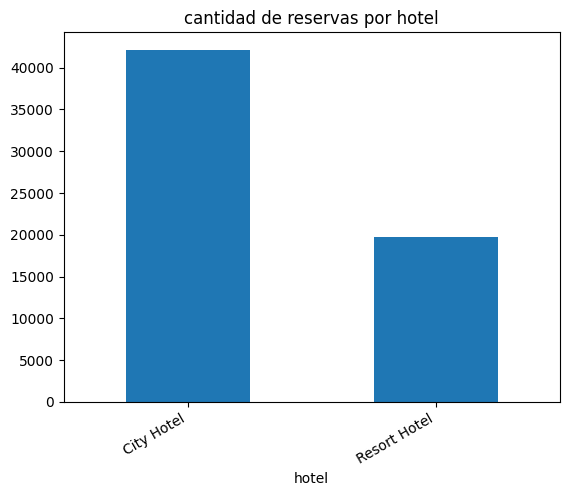

In [4]:
df['hotel'].value_counts().plot(kind='bar')
plt.xticks(rotation=30,horizontalalignment='right')
plt.title('cantidad de reservas por hotel')

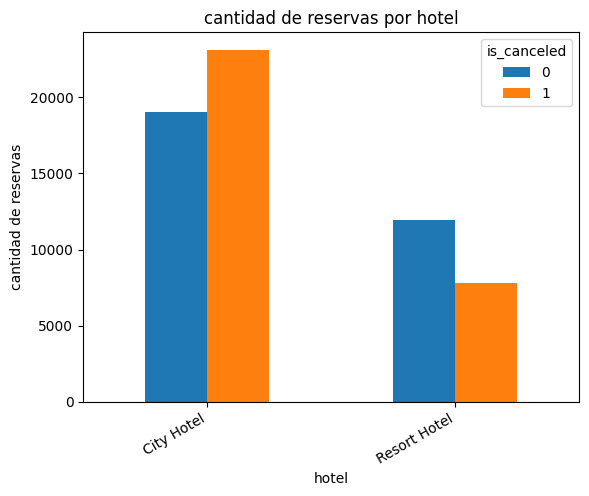

In [5]:
pd.crosstab(df.hotel, df.is_canceled).plot(kind='bar')
plt.xticks(rotation=30,horizontalalignment='right')
plt.ylabel('cantidad de reservas')
plt.title('cantidad de reservas por hotel')
plt.show()

Observamos que es una variable importante con relación al problema, ya que de hecho se podrían hacer estudios separados para cada hotel. Pero lo más importante es que el 'City Hotel' presenta una significante cantidad superior de reservas canceladas, mientras que el 'Resort Hotel' es al contrario, presenta más reservasa no canceladas.

Es muy fácil hacer un encoding para las categorías, ya que se trata de un caso binario. Creamos una nueva variable y le asignamos 1 al 'Resort Hotel' y 0 al 'City Hotel'

In [6]:
df['hotel_encoding'] = np.where(df['hotel'] == 'Resort Hotel', 1, 0)

2. `stays_in_week_nights`: Variable numérica (entero) que nos dicen cuantas noches de **días de semana** se quedan los huéspedes.
    - *Moda:* 2
    - *Media:* 2.510
    - *Mediana:* 2
    
3. `stays_in_weekend_nights`: Variable numérica (entero) que nos dice cuantas noches de **fin de semana** se quedan los huéspedes. 
    - *Moda:* 0
    - *Media:* 0.9241
    - *Mediana:* 1

<Axes: >

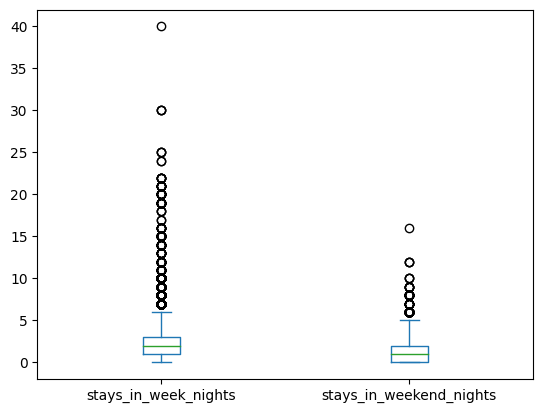

In [7]:
df[['stays_in_week_nights', 'stays_in_weekend_nights']].plot(kind='box')

4. `arrival_date_year`: variabe numérica nos dice el año para el cual se reservó la habitación. Los valores están entre 2015 y 2017

Si tenemos en cuenta que queremos crear un modelo que pueda predecir si una nueva reserva va a ser cancelada o no, es inútil entrenar a nuestro modelo explicitando los años anteriores. Es decir, no queremos encontrar un patrón con respecto a un año específico, ya que el hotel no va a volver a recibir reservaciones de un año que ya pasó.
En cambio queremos encontrar patrones que generalicen a cualquier año y ayuden al modelo a determinar si la reserva va a ser cancelada. Por ejemplo, encontrando que a principios de año se producen más cancelaciones que a final de año, o algo por el estilo.

Por estas razones creemos que la variable `arrival_date_year` es irrelevante para el análisis.

4. `arrival_date_week_number`: variable numérica que nos indica la semana del año para la cual reservaron los huéspedes. 
    - *Moda:* 33
    - *Media:* 27.2
    - *Mediana:* 28

Podemos plottear la distribucion de reservaciones canceladas y no canceladas durante todo el año:

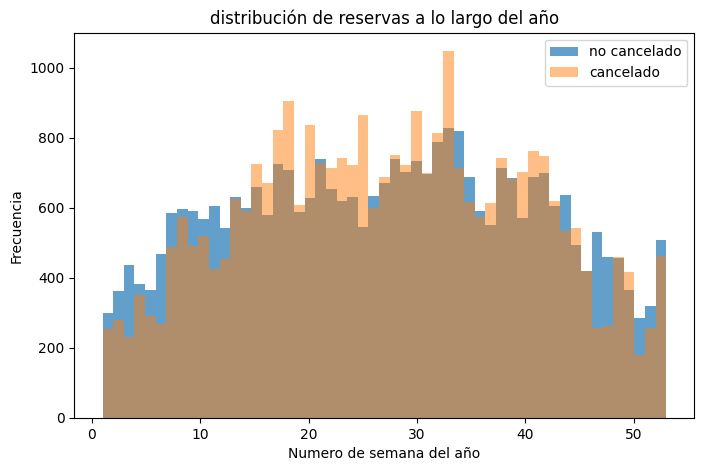

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
df.loc[df.is_canceled == 0, 'arrival_date_week_number'].plot(kind='hist', bins=53, alpha=0.7, ax=ax, label='no cancelado')
df.loc[df.is_canceled == 1, 'arrival_date_week_number'].plot(kind='hist', bins=53, alpha=0.5, ax=ax, label='cancelado')
ax.legend()
ax.set_xlabel("Numero de semana del año")
ax.set_ylabel("Frecuencia")
ax.set_title("distribución de reservas a lo largo del año")
plt.show()

5. `arrival_date_month`: es una variable categorica que nos indica el mes para el cual reservaron:

Podemos realizar un análisis parecido como con `arrival_date_week_number`, pero para cada mes:

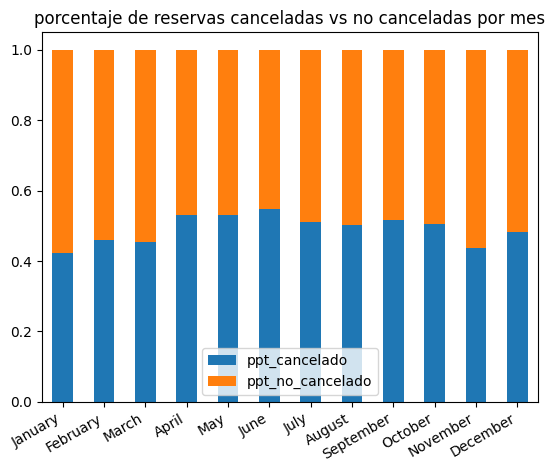

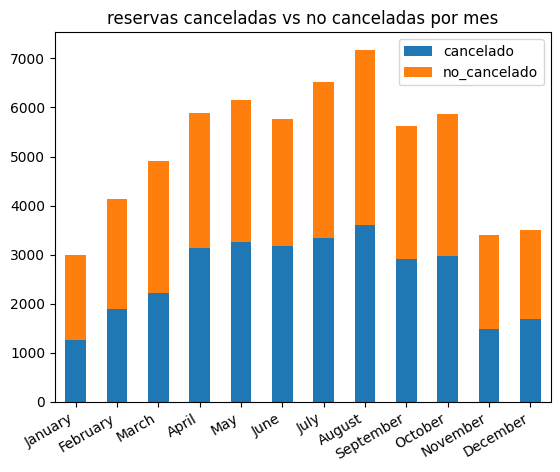

In [9]:
dd = pd.DataFrame({
    'cancelado': df.loc[df.is_canceled == 1, 'arrival_date_month'].value_counts(),
    'no_cancelado': df.loc[df.is_canceled == 0, 'arrival_date_month'].value_counts(),
},index= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

dd['ppt_cancelado']  =  dd['cancelado']  / (dd['cancelado'] + dd['no_cancelado'])
dd['ppt_no_cancelado']  =  dd['no_cancelado']  / (dd['cancelado'] + dd['no_cancelado'])

dd[['ppt_cancelado', 'ppt_no_cancelado']].plot(kind='bar', stacked=True)
plt.title("porcentaje de reservas canceladas vs no canceladas por mes")
plt.xticks(rotation=30, horizontalalignment='right')

dd[['cancelado', 'no_cancelado']].plot(kind='bar', stacked=True)
plt.title("reservas canceladas vs no canceladas por mes")
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

6. `arrival_date_day_of_month`: variable numérica que nos indica para que día del mes llegan los huéspedes.
    - *Moda:* 17
    - *Media:* 15.78
    - *Mediana:* 16

utilizando la variable `arrival_date_day_of_month` podemos analizar la distribucion de las reservaciones para cada mes:

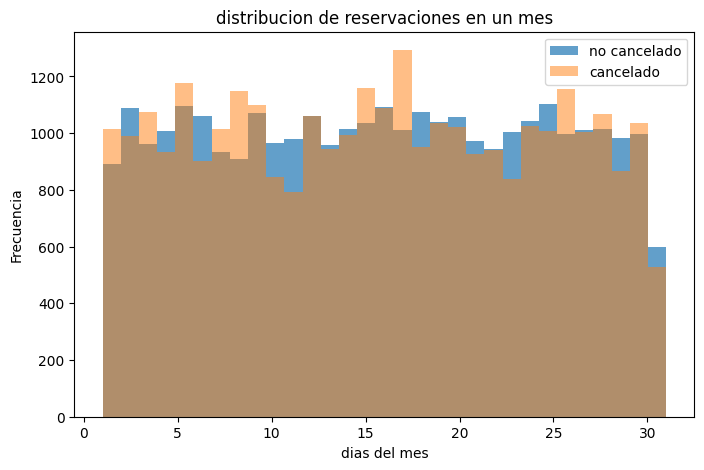

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
df.loc[df.is_canceled == 0, 'arrival_date_day_of_month'].plot(kind='hist', bins=31, alpha=0.7, ax=ax, label='no cancelado')
df.loc[df.is_canceled == 1, 'arrival_date_day_of_month'].plot(kind='hist', bins=31, alpha=0.5, ax=ax, label='cancelado')
ax.legend()
ax.set_xlabel("dias del mes")
ax.set_ylabel("Frecuencia")
ax.set_title("distribucion de reservaciones en un mes")
plt.show()

A simple vista no parece haber días en los que hayan más reservas, canceladas o no canceladas. Algo a tener en cuenta es que `arrival_date_day_of_month` y `arrival_date_month` pueden reconstruir a `arrival_date_week_number` perfectamente. Esto quiere decir que esta última variable esta implícita en las otras dos, por lo que en principio podríamos omitirla. O podríamos utilizar la de las semanas en lugar de las otras 2, si no queremos que el modelo quede ajustado a los meses y dias del mes.

7. `lead_time`: variable numérica que nos indica el numero de dias desde la reservación hasta la fecha de llegada al hotel.
    - *Moda:* 0
    - *Media:* 112.2
    - *Mediana:* 78

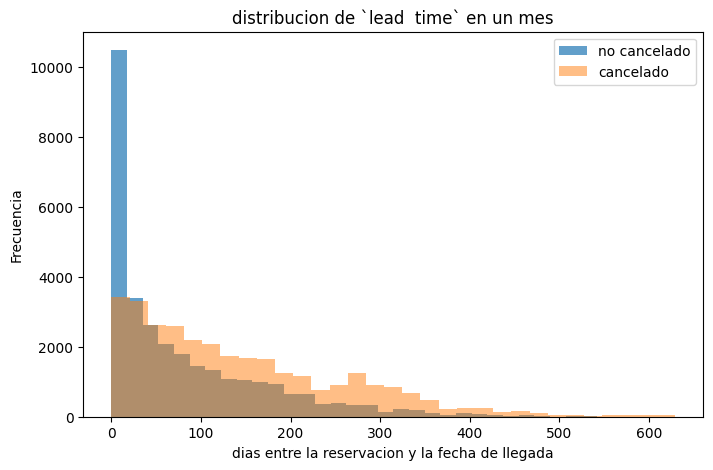

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
df.loc[df.is_canceled == 0, 'lead_time'].plot(kind='hist', bins=31, alpha=0.7, ax=ax, label='no cancelado')
df.loc[df.is_canceled == 1, 'lead_time'].plot(kind='hist', bins=31, alpha=0.5, ax=ax, label='cancelado')
ax.legend()
ax.set_xlabel("dias entre la reservacion y la fecha de llegada")
ax.set_ylabel("Frecuencia")
ax.set_title("distribucion de `lead  time` en un mes")
plt.show()

observamos como las reservas que se hacen el mismo dia de la llegada (lead time == 0) **no suelen ser canceladas**. Esto se puede deber a que llegan al hotel sin una reserva, y al hacerlo en el momento, no la van a cancelar. En cambio si la reserva se hace con mucha antelación (más de 100 dias), la **tendencia suele ser que la reserva sea cancelada**.  Por estas razones,  a priorir `lead_time` parece ser un gran predictor de `is_canceled`.

11. `adults`, `children`, `babies`: variables numéricas que cuentan la cantidada de adultos, nenes y bebes registrados en la reserva.

In [12]:
df[['adults', 'children', 'babies']].describe()

,adults,children,babies
count,61913.000000,61909.000000,61913.000000
mean,1.862791,0.104896,0.007155
std,0.589066,0.402847,0.092158
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000
max,55.000000,10.000000,9.000000


Observamos como estas 3 variables varían muy poco, no solo por su bajo desvío estándar (menores que 1), sino porque desde el mínimo hasta el cuantil 75% los valores son los mismos.
Esto podemos verlo en un dispersograma, ya que están todas en su mayoría concentradas en un lugar, y un par de valores atípicos alejados:

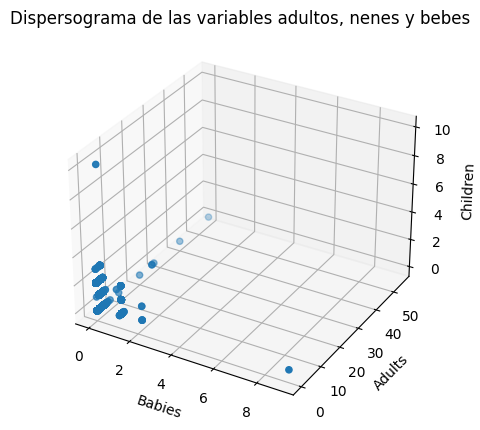

In [13]:
fig = plt.figure(figsize=(5, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(df.babies,df.adults,df.children)
ax.set_ylabel('Adults')
ax.set_xlabel('Babies')
ax.set_zlabel('Children')

plt.title('Dispersograma de las variables adultos, nenes y bebes')
plt.show()

In [14]:
df[['adults', 'children', 'babies']].isnull().sum() * 100 / len(df.index)

adults      0.000000
children    0.006461
babies      0.000000
dtype: float64

In [15]:
df[df['children'].isna() == True][['children', 'adults', 'babies']]

,children,adults,babies
27359,NaN,3,0
32654,NaN,2,0
50323,NaN,2,0
58511,NaN,2,0


In [16]:
df['children'] = df['children'].replace(np.nan, 0)

In [17]:
len(df[df['adults'] == 0])

197

Algo a tener en cuenta, es que hay casi 200 registros que no presentan adultos. No aclara en el paper si es posible o no que hagan niños la reservacion, pero observamos que son todos en su mayoria del city hotel:

In [18]:
pd.crosstab(df[df['adults'] == 0]['hotel'], df['is_canceled'])

is_canceled,0,1
hotel,,
City Hotel,117,75
Resort Hotel,5,0


Asi que al parecer el city hotel permite que niños/adolescentes hagan reservaciones, por lo que en principio (por análisis lógico) no vamos a removerlos del dataset.

Lo que si vamos a eliminar del dataset son los registros en los cuales no se reservan personas (las tres variables son cero), ya que son claramente errores (MCAR):

In [19]:
sin_personas = df[(df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0)]
print(len(sin_personas))

76


In [20]:
df = df.drop(index=sin_personas.index)

12. **meal:** Esta variable es de tipo alfanumérica y contendrá (en forma de acrónimo) el tipo de servicio de comida correspondiente a la reserva. Los posibles valores que puede tomar son:
  - Undefined: No se reservó servicio de comida. Aparece en 591 (0.95%) de los registros.
  - SC: Tiene el mismo significado que Undefined. Aparece en 5556 (8.97%) de los registros.
  - BB: Sólo desayuno. Aparece en 47837 (77.26%) de los registros.
  - HB: Desayuno y otra comida (generalmente cena). Aparece en 5556 (8.97%) de los registros.
  - FB: Desayuno, almuerzo y cena. Aparece en 477 (0.77%) de los registros

<Axes: xlabel='meal'>

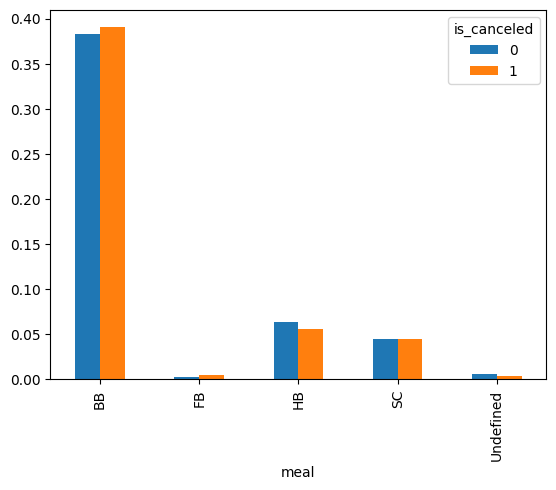

In [21]:
pd.crosstab(df['meal'], df['is_canceled'], normalize=True).plot(kind='bar')

Vemos que para cada servicio de comida, los porcentajes para los cancelados y no cancelados son casi equivalentes en casi todos los casos, por lo que podemos descartar esta variable al tener un comportamiento que tiende a la aleatoridad.
***

13. **country:** Esta variable es también de tipo alfanumérica en la que se representa mediante el código ALPHA-3 el nombre de un país, el cual será el origen de la reserva. Como posibles valores, tenemos 149 códigos en todos los registros, siendo Portugal (PRT) el más frecuente con 27950 apariciones y algunos paises como Fiji (FJI), Liechstein (LIE), Antartida (ATA) y Ruanda (RWA) los que solo aparecen en una.

Al ser tantos paises (149) se dificulta la visualización de datos, por lo que vamos a buscar los paises que representen al menos 1% de los registros para realizar los gráficos.

In [22]:
columna='country'
print(df[columna].value_counts(normalize=True)[0:15])

country
PRT    0.452833
GBR    0.093004
FRA    0.077928
ESP    0.068272
DEU    0.053748
ITA    0.030963
IRL    0.026225
BRA    0.018695
BEL    0.018241
USA    0.016537
NLD    0.015920
CHE    0.013729
CN     0.009688
AUT    0.009429
CHN    0.008844
Name: proportion, dtype: float64


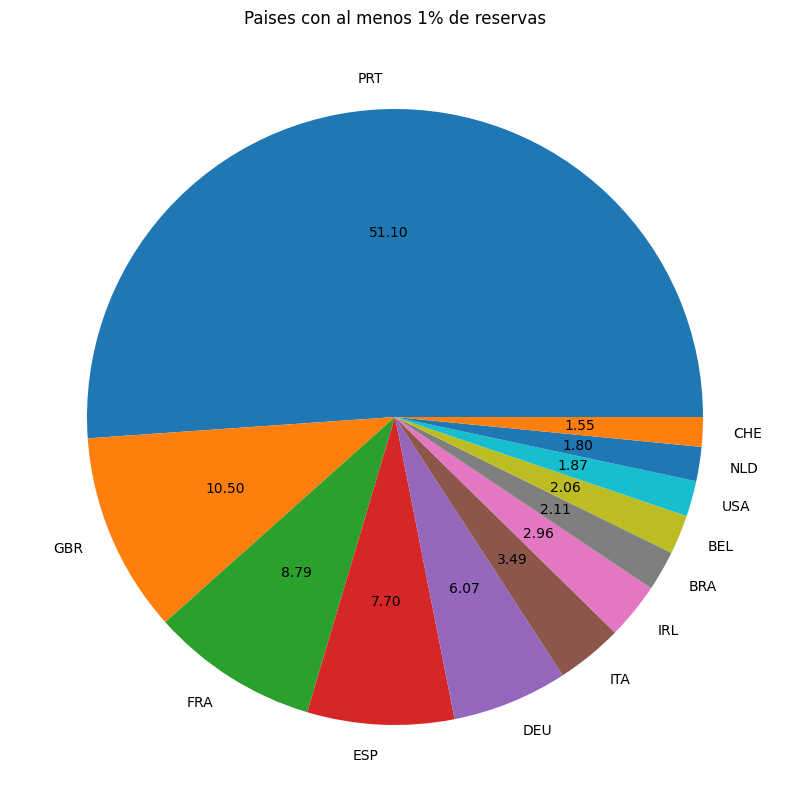

In [23]:
plt.figure(figsize = (10,10))
plt.title('Paises con al menos 1% de reservas')
plt.pie(df[columna].value_counts()[:12],labels = df[columna].value_counts()[:12].index, autopct='%.2f')
plt.show()

Vemos ahora cuáles son los países que aparecen en por lo menos el 1% de las cancelaciones para tenerlos en cuenta al graficar

In [24]:
print(df_cancelado[columna].value_counts(normalize=True)[0:15])

country
PRT    0.622362
GBR    0.054804
ESP    0.049495
FRA    0.043377
ITA    0.029975
DEU    0.028486
BRA    0.018872
IRL    0.018484
USA    0.011233
BEL    0.011071
CHN    0.010456
CHE    0.009970
NLD    0.008805
CN     0.006280
RUS    0.005471
Name: proportion, dtype: float64


Vemos que son 12 paises. Procedemos a realizar el gráfico.

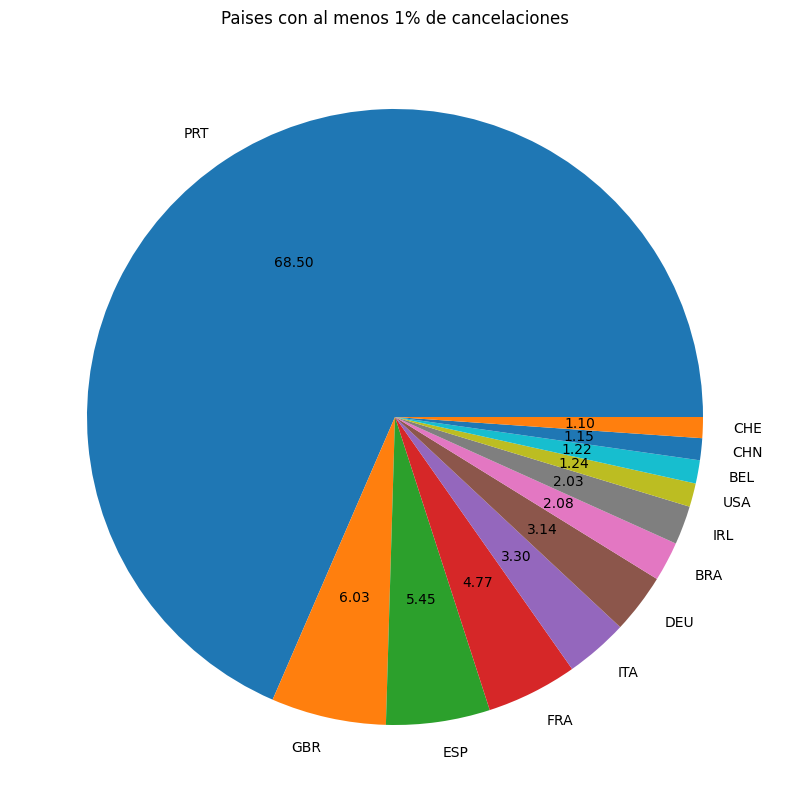

In [25]:
plt.figure(figsize = (10,10))
plt.title('Paises con al menos 1% de cancelaciones')
plt.pie(df_cancelado[columna].value_counts()[:12],labels = df_cancelado[columna].value_counts()[:12].index, autopct='%.2f')
plt.show()

Finalmente realizamos el mismo procedimiento pero con los NO cancelados.

In [26]:
columna='country'
print(df[columna].value_counts(normalize=True)[0:15])

country
PRT    0.452833
GBR    0.093004
FRA    0.077928
ESP    0.068272
DEU    0.053748
ITA    0.030963
IRL    0.026225
BRA    0.018695
BEL    0.018241
USA    0.016537
NLD    0.015920
CHE    0.013729
CN     0.009688
AUT    0.009429
CHN    0.008844
Name: proportion, dtype: float64


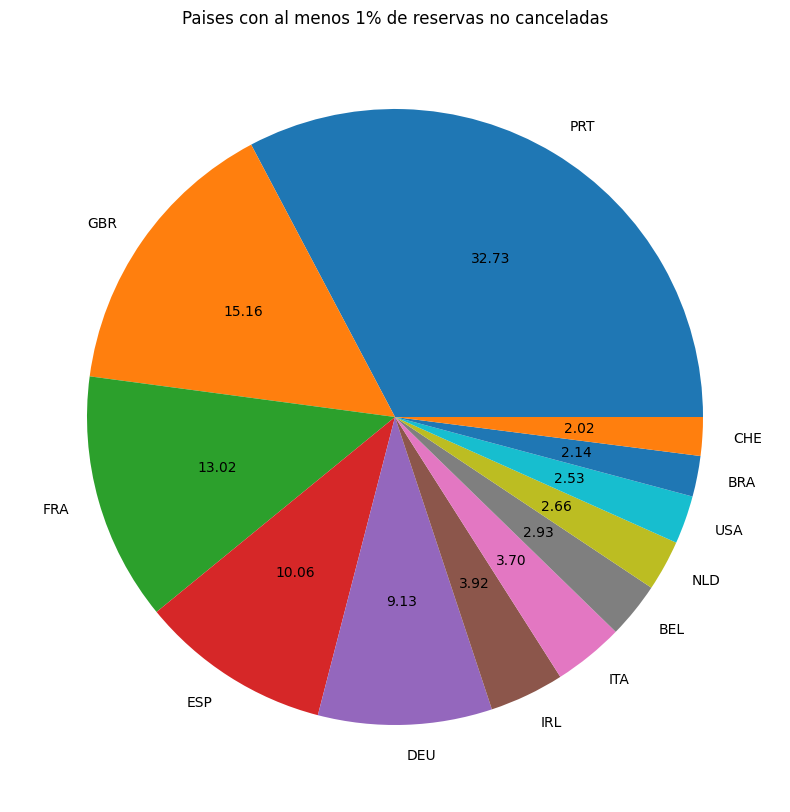

In [27]:
plt.figure(figsize = (10,10))
plt.title('Paises con al menos 1% de reservas no canceladas')
plt.pie(df_no_cancelado[columna].value_counts()[:12],labels = df_no_cancelado[columna].value_counts()[:12].index, autopct='%.2f')
plt.show()

Notamos que hay ciertos paises en el top que cuentan con un porcentaje más alto de cancelaciones (y también otras que no cancelaron) por lo que esta columna nos sirve para predecir el comportamiento de nuestro **target**
***

14. **market_segment:** Designación del cliente en cuanto a la segmentación de mercado (una segmentación que divide a los clientes en grupos más pequeños los cuales comparten caracteristicas similares). Puede tomar los siguientes valores:
  - Online TA: Agente de viajes en linea. Aparece en 29269 (47.26%) registros.
  - Offline TA/TO: Agentes de viaje u operadores de turismo los cuales no son por medio de internet. Aparece en 12384 (20%) registros.
  - Groups: Por grupos. Aparece en 11545 (18.64%) registros.
  - Direct: Directa. Aparece en 5757 (9.29%) registros.
  - Corporate: Reservas realizadas por empresas. Aparece en 2484 (4.01%) registros.
  - Complementary: Complementarios utilizados principalmente por aerolíneas y agencias de viaje. Aparece en 359 (0.58%) registros.
  - Aviation: Clientes que provienen de la aviación. Aparece en 113 (0.18%) registros.
  - Undefined: No se completaron los datos. Aparece en 2 (0.003%) registros.

Text(0.5, 1.0, 'comparación de market segments')

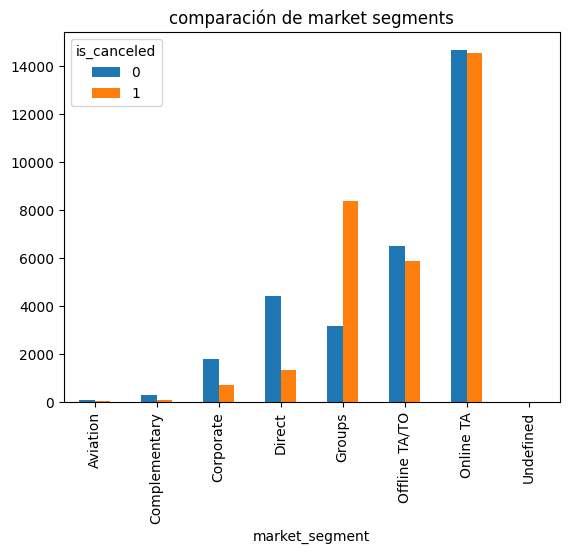

In [28]:
pd.crosstab(df['market_segment'], df['is_canceled']).plot(kind='bar')
plt.title("comparación de market segments")

Podemos ver que hay algunos market segments más propensos a cancelar que otros, aunque en el que más registros tiene no se observa esta tendencia. Debido a esto, no descartamos que la variable pueda ayudarnos a predecir el **target**.
***

15. **distribution_channel:** Nos indica el canal de la distribución de la reserva, el cual es un intermediario en linea entre el hotel y el cliente a la hora de reservar. En nuestros registros, toma los siguientes valores:
  - TA/TO: Agentes de viaje u operadores de turismo. Aparece en 51849 (83.74%) registros.
  - Direct: Directa. Aparece en 6799 (10.98%) registros.
  - Corporate: Reservas realizadas por empresas. Aparece en 3172 (5.12%) registros.
  - GDS: Clientes que provienen de la aviación. Aparece en 89 (0.14%) registros.
  - Undefined: No se completaron los datos. Aparece en 4 (0.006%) registros.

is_canceled               0      1
distribution_channel              
Corporate              2130   1033
Direct                 5027   1762
GDS                      63     26
TA/TO                 23692  28100
Undefined                 0      4


Text(0.5, 1.0, 'comparación de distribution channels')

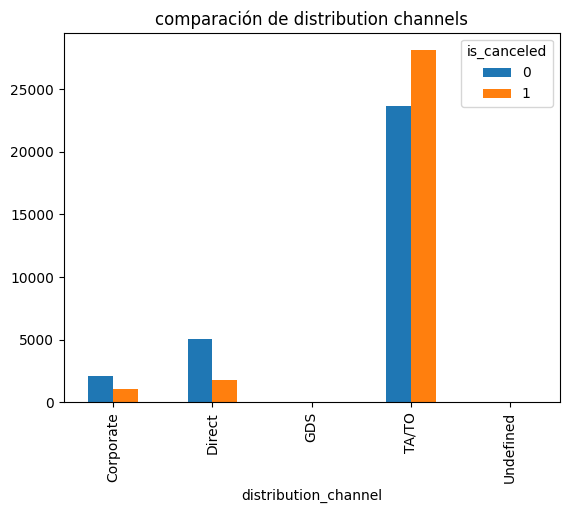

In [29]:
print(pd.crosstab(df['distribution_channel'], df['is_canceled']))
pd.crosstab(df['distribution_channel'], df['is_canceled']).plot(kind='bar')
plt.title("comparación de distribution channels")

Vemos que los que reservan a través de una agencia de viajes u operadora de turismo, tienden a cancelar más reservas, mientras que en los otros casos hay mas reservas sin cancelar que canceladas (sin considerar las reservas en donde no se completaron los datos, que fueron todas canceladas), por lo que podemos usar esta columna para entrenar a nuestro modelo.
***

16. **is_repeated_guest:** Esta variable de tipo booleana nos dice si la reserva fue hecha anteriormente por un invitado repetido (en este caso toma el valor 1) o no (toma el valor 0). Si un perfil está asociado al cliente y si la fecha de creación del perfil de este para la reserva coinciden, se asume que es un invitado repetido.
  - *Moda:* 0
  - *Media:* 0.028
  - *Mediana:* 0

is_canceled,0,1
is_repeated_guest,,
0,29606,30522
1,1306,403


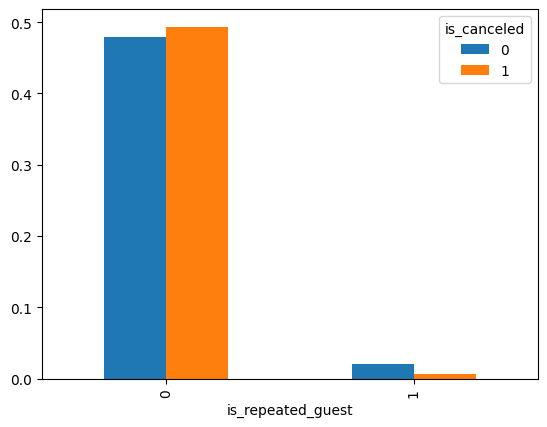

In [30]:
pd.crosstab(df['is_repeated_guest'], df['is_canceled'],normalize=True).plot(kind='bar')
pd.crosstab(df['is_repeated_guest'], df['is_canceled'],normalize=False)

Notamos que si el cliente está reservando por primera vez, puede cancelar o no, mientras que si ya habia reservado antes es más propenso a no cancelar. Por lo que podriamos considerar el análisis de esta variable solo en el caso de que el cliente haya reservado en una ocasión anterior.
***

17. **previous_cancellations:** Esta variable de tipo entero nos da información sobre la cantidad de veces en las que el cliente solicitando la reserva canceló en reservas anteriores (en el caso que no haya un perfil de cliente asociado a la reserva, este valor será 0). 
  - *Moda:* 0
  - *Media:* 0.1148
  - *Mediana:* 0
  
18. **previous_bookings_not_canceled:** Esta variable de tipo entero nos da información sobre la cantidad de veces en las que el cliente solicitando la reserva no canceló en las hechas anteriormente. Podriamos afirmar que sumando la variable anterior y esta, podemos obtener cuántas reservas previas hizo el cliente, siempre y cuando los datos estén completos.
  - *Moda:* 0
  - *Media:* 0.1154
  - *Mediana:* 0

In [31]:
print('NaNs de cancelaciones previas', df['previous_cancellations'].isnull().sum())
print('NaNs de reservas no canceladas', df['previous_bookings_not_canceled'].isnull().sum())

NaNs de cancelaciones previas 0
NaNs de reservas no canceladas 0


Por el análisis anterior y como corroboramos que no hay ningún registro faltante de estas dos columnas, podemos obtener el total de las reservas hechas por el cliente antes de realizar la que se encuentra en el registro.

<Axes: xlabel='total_bookings', ylabel='Frecuencia'>

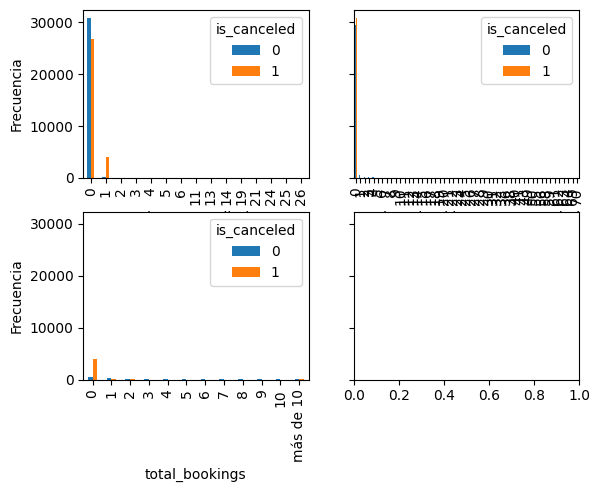

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True)

pd.crosstab(df['previous_cancellations'], df['is_canceled']).plot(kind='bar', ylabel='Frecuencia', ax=axes[0][0])
pd.crosstab(df['previous_bookings_not_canceled'], df['is_canceled']).plot(kind='bar', ylabel='Frecuencia',ax=axes[0][1])

df['total_bookings'] = pd.cut(df["previous_cancellations"] + df["previous_bookings_not_canceled"], bins=[0,1,2,3,4,5,6,7,8,9,10,11,float('inf')], labels=['0','1','2','3','4','5','6','7','8','9','10','más de 10'])
pd.crosstab(df['total_bookings'], df['is_canceled']).plot(kind='bar', ylabel='Frecuencia',ax=axes[1][0])

Borramos la columna total_bookings de nuestro dataFrame, ya que fue creada solamente para la visualización de los datos

In [ ]:
df.drop(columns=['total_bookings'])
df.columns

Las unicas conclusiones que podemos sacar son las siguientes: En primer lugar, vemos en el de las cancelaciones previas que si no cancelo ninguna, es más propenso a volver a no cancelar, mientras que si cancelo una sola vez, casi seguramente vuelva a hacerlo. Y la otra es que las cancelaciones provienen más de la gente que no hizo ninguna reserva anteriormente, mientras que los clientes que hicieron 1 o más es menos probable que cancelen (consideramos que los casos de más de 10 reservas son valores atípicos, sin embargo la tendencia mencionada anteriormente se mantiene). Por esta razón, podemos considerar esta variable como una buena predictora en cuanto al **target**
***

19. **reserved_room_type:** Representa el código de habitación que el cliente solicitó al realizar la reserva. Se presenta el código en vez de la designación por razones de anonimidad. Puede tomar los siguientes valores:
  - A: 45134 (72.9%)
  - D: 9585 (15.48%)
  - E: 3249 (5.25%)
  - F: 1451 (2.34%)
  - G: 1090 (1.76%)
  - B: 580 (0.94%)
  - C: 482 (0.78%)
  - H: 334 (0.54%)
  - P: 7 (0.011%)
  - L: 1 (0.001%)
***
20. **assigned_room_type:** En esta variable vemos el código de habitación que se le asigno a la reserva, el cual puede diferir del originalmente solicitado por varias cuestiones operativas del hotel o bien por petición del cliente. Se muestra el código por las mismas razones que en la variable anterior. Toma los siguientes valores:
  - A: 40007 (64.62%)
  - D: 12190 (19.69%)
  - E: 3779 (6.10%)
  - F: 1821 (2.94%)
  - G: 1277 (2.06%)
  - C: 1127 (1.82%)
  - B: 1056 (1.71%)
  - H: 384 (0.62%)
  - I: 145 (0.23%)
  - K: 119 (0.19%)
  - P: 7 (0.011%)
  - L: 1 (0.001%)

In [36]:
df['reserved_room_was_assigned'] = df.assigned_room_type == df.reserved_room_type

pd.crosstab(df.is_canceled, df.reserved_room_was_assigned)

reserved_room_was_assigned,False,True
is_canceled,,
0,5803,25109
1,572,30353


In [37]:
pd.crosstab(df['assigned_room_type'], df['reserved_room_type'])

reserved_room_type,A,B,C,D,E,F,G,H,L
assigned_room_type,,,,,,,,,
A,39791,52,3,134,7,2,4,0,0
B,511,516,1,13,2,7,1,0,0
C,648,0,464,12,2,0,0,0,0
D,3198,3,1,8970,9,2,0,1,0
E,489,1,2,297,2969,16,0,0,0
F,188,1,2,69,195,1358,8,0,0
G,64,4,2,41,39,57,1064,3,0
H,42,0,5,3,1,1,3,329,0
I,85,0,2,26,15,6,8,1,0


Mediante el análisis realizado anteriormente, vemos que, si bien no es un porcentaje tan alto, las reservas cuya habitación reservada fue cambiada tienden a no cancelar la reserva.
***

21. **booking_changes:** Esta variable de tipo entero nos da información acerca de la cantidad de cambios o correcciones que se hicieron en la reserva desde el momento de la creación hasta el check-in o la cancelación de la misma. 
  - *Moda:* 0
  - *Media:* 0.196
  - *Mediana:* 0

booking_changes,0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,17
is_canceled,,,,,,,,,,,,,,,,
0,24620,4532,1247,312,112,43,16,14,6,1,2,1,3,1,1,1
1,28934,1276,538,91,50,13,15,2,3,1,1,0,0,1,0,0


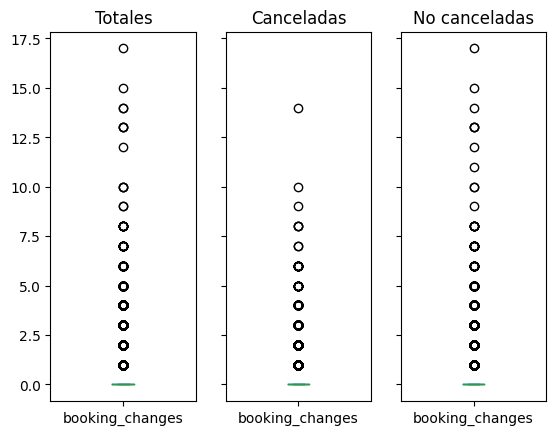

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True)
columna = 'booking_changes'

df[columna].plot(kind='box', ax=axes[0], title='Totales')
df_cancelado[columna].plot(kind='box', ax=axes[1], title='Canceladas')
df_no_cancelado[columna].plot(kind='box', ax=axes[2], title='No canceladas')

pd.crosstab(df.is_canceled, df.booking_changes)

Como vemos en el boxplot, las cantidades de cambios en la reserva mayores a 0 son tan pocas que pueden considerarse valores atipicos, por lo que podemos decir que esta variable no debe tenerse en cuenta para predecir si la reserva será o no cancelada.
***

21. **deposit_type:** Esta variable cualitativa es de tipo alfanumérica y contendrá informacion sobre el tipo de reserva.
      Los posibles valores son:
    - *No Deposit:* No se realizo deposito. Aparece en 51685 (83.5%) de los registros.
    - *Non Refund:* Se realizo deposito por un valor igual o superior al valor de la reserva. Aparece en 10150 (16.4%) de los registros.
    - *Refundable:* Se realizo deposito por un valor menos al valor de la reserva. Aparece en 78 (0.13%) de los registros.

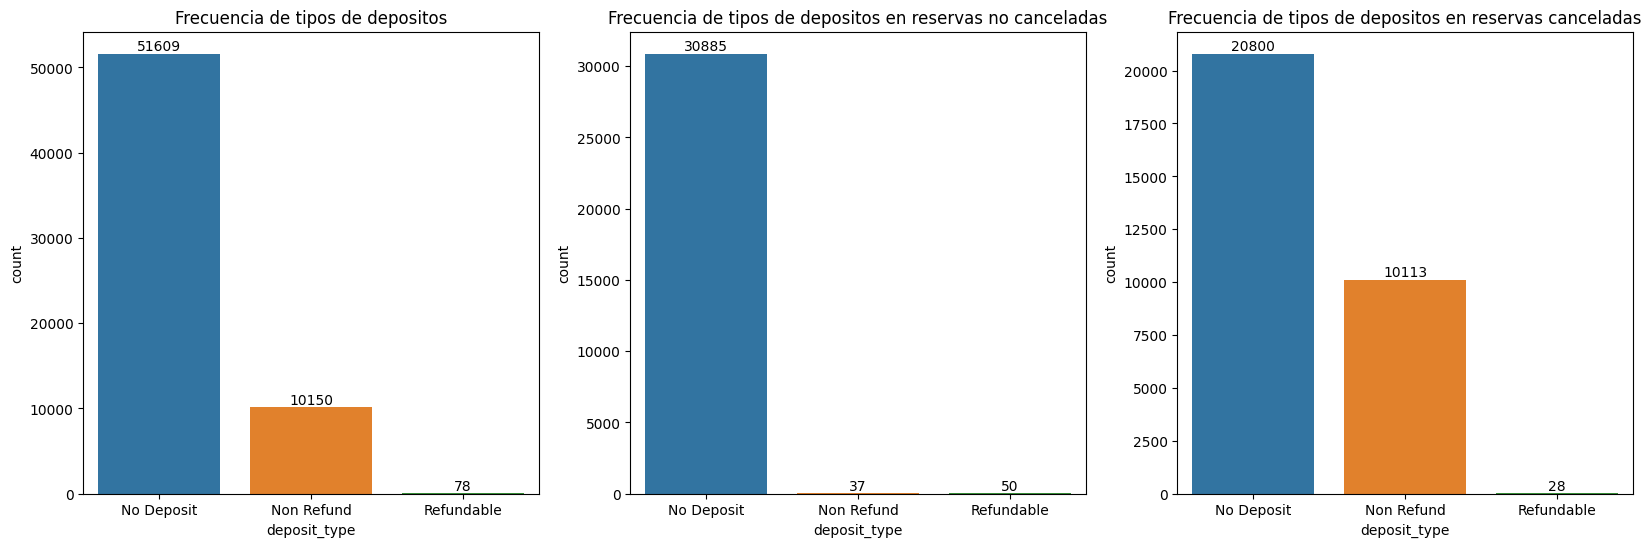

In [45]:
ig, ax = plt.subplots(1, 3, figsize = (20, 6))

sns00 = sns.countplot(data = df, x = "deposit_type", ax = ax[0])
for label in sns00.containers:
    sns00.bar_label(label)

sns01 = sns.countplot(data = df_no_cancelado, x = "deposit_type", ax = ax[1])
for label in sns01.containers:
    sns01.bar_label(label)
    
sns02 = sns.countplot(data = df_cancelado, x = "deposit_type", ax = ax[2])
for label in sns02.containers:
    sns02.bar_label(label)

ax[0].set_title('Frecuencia de tipos de depositos')
ax[1].set_title('Frecuencia de tipos de depositos en reservas no canceladas')
ax[2].set_title('Frecuencia de tipos de depositos en reservas canceladas')


plt.show()

Notamos que aquellas reservas que no tienen un deposito no son canceladas en un 59.7% mientras que las reservas que tiene un deposito por un valor igual o mayor al valor reserva son casi en su totalidad canceladas.
***

22. **agent:** Esta variable cualitativa es de tipo numerica y contendra informacion sobre el ID del agente de viajes (en caso 
    de que se uso uno) con el cual se realizo la reserva, sino fue utlizado un agente se describe esto mediante NULL.
    Los agentes mas utlizados son:
    - *9.0:* Aparece en 17004 (27.5%) de los registros.
    - *240:* Aparece en 7386 (12%) de los registros.
    - *1.0:* Aparece en 4424 (7.15%) de los registros.

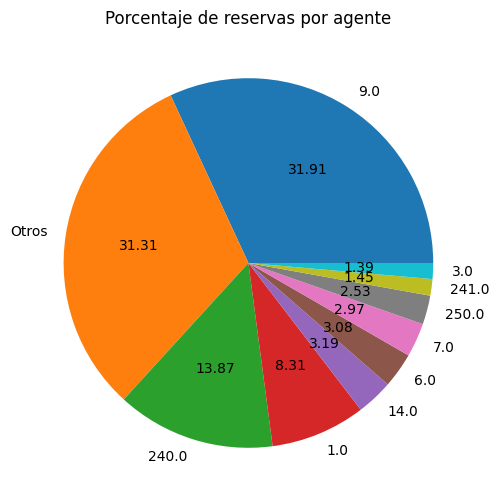

In [47]:
plt.figure(figsize = (10,6))
plt.title('Porcentaje de reservas por agente')

df_pie = df[df['agent'].isnull() == False] #dataframe sin Nan

todos_los_agentes = list(df_pie['agent'].value_counts().index)

a = pd.Series(np.where(df_pie['agent'].isin(todos_los_agentes[10:]), 'Otros' , df_pie['agent']))

values = list(a.value_counts())[:10]

labels = list(a.value_counts().index)[:10]

plt.pie(values, labels = labels, autopct='%.2f')

plt.show()

En total son 297 posibles valores los que toma esta variable incluyendo a NULL. En el grafico se muestran en que porcentaje se usaron los 10 agentes mas frecuentes, teniendo en cuenta solamente los registros donde un agente fue registrado.
***

23. **company:** Esta variable cualitativa es de tipo numerica y contendra informacion sobre el ID de la compañia (en caso 
    de que haya sido una) la cual realizo/ abono la reserva, si no fue realiada pur una compañia se describe esto mediante NULL.
    Las compañias que mas reservas realizaron son:
    - *40.0:* Aparece en 390 (0.63%) de los registros.
    - *223.0:* Aparece en 364 (0.59%) de los registros.
    - *67.0:* Aparece en 169 (0.27%) de los registros.

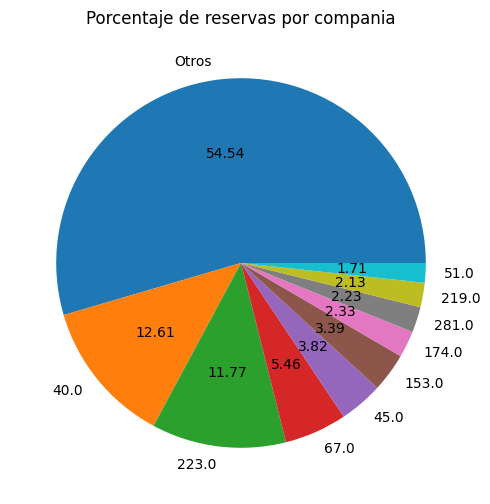

In [49]:
plt.figure(figsize = (10,6))
plt.title('Porcentaje de reservas por compania')

df_compania = df[df['company'].isnull() == False] #dataframe sin Nan

todas_las_companias = list(df_compania['company'].value_counts().index)

a = pd.Series(np.where(df_compania['company'].isin(todas_las_companias[10:]), 'Otros' , df_compania['company']))

values = list(a.value_counts())[:10]

labels = list(a.value_counts().index)[:10]

plt.pie(values, labels = labels, autopct='%.2f')

plt.show()

En total son 277 posibles valores los que toma esta variable incluyendo a NULL. En el grafico se muestran en que porcentaje se usaron las 10 companias mas frecuentes, teniendo en cuenta solamente los registros donde una compania fue registrada.
***

24. **days_in_waiting_list:** Esta variable cuantitativa de tipo numerica contendra informacion sobre los dias que estuvo en
    espera la reserva del cliente hasta que fue confirmada por parte del hotel. Sus analisis inicial:
    - *Moda:* 0.
    - *Media:* 2.6.
    - *Mediana:* 0.

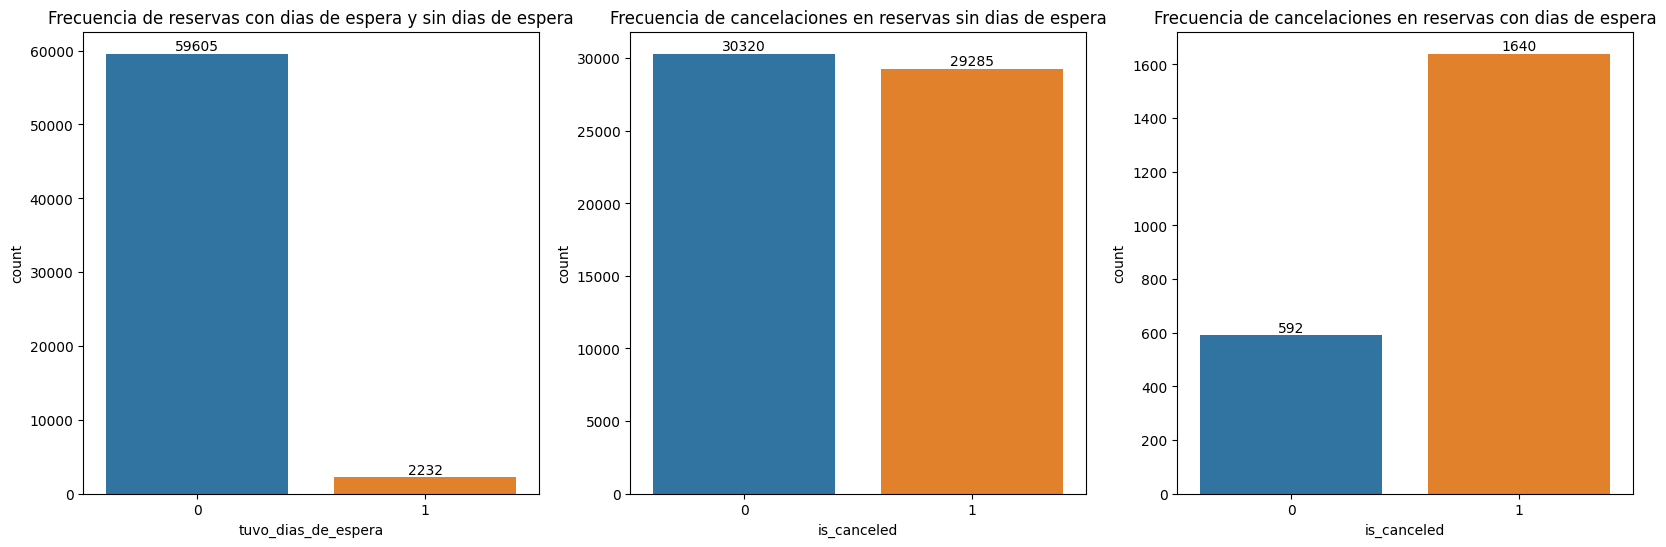

In [51]:
#creo nueva Columna a una copia del df original,'tuvo_dias_de_espera' donde 1 si los tuvo, 0 si no los tuvo
df_grafico = df.copy()
df_grafico['tuvo_dias_de_espera'] = np.where(df_grafico['days_in_waiting_list'] != 0, 1 , 0)
df_sin_dias_de_espera = df_grafico[df['days_in_waiting_list'] == 0]
df_con_dias_de_espera = df_grafico[df['days_in_waiting_list'] != 0]

ig, ax = plt.subplots(1, 3, figsize = (20, 6))

sns00 = sns.countplot(data = df_grafico, x = "tuvo_dias_de_espera", ax= ax[0])
for label in sns00.containers:
    sns00.bar_label(label)

sns01 = sns.countplot(data = df_sin_dias_de_espera, x = "is_canceled", ax= ax[1])
for label in sns01.containers:
    sns01.bar_label(label)

sns02 = sns.countplot(data = df_con_dias_de_espera, x = "is_canceled", ax= ax[2])
for label in sns02.containers:
    sns02.bar_label(label)

ax[0].set_title('Frecuencia de reservas con dias de espera y sin dias de espera')
ax[1].set_title('Frecuencia de cancelaciones en reservas sin dias de espera')
ax[2].set_title('Frecuencia de cancelaciones en reservas con dias de espera')

plt.show()

No hubo dias de espera en 59677 registros (96%) y hubo 2235 (4%) donde si los hubo. Notamos que aquellas reservas que no tuvieron dias de espera, el porcentaje de reservas canceladas es aproximadamente el 50% por lo que esta variable no pareciera generar una mayor o menor cantidad de cancelaciones cuando no hubo dias de espera. Por otro lado notamos que en aquellas reservas donde si hubo dias de espera, el porcentaje de cancelaciones es del 60% por lo que si pareciera influir en las cancelaciones.

***

25. **customer_type:** Esta variable cualitativa es de tipo alfanumerica y contendra informacion sobre el tipo de reserva realizada
    contemplando 4 posibles categorias:
    - *Contract:* Indica que la reserva esta asociada a un paquete turistico. Aparece en 2033 (3.3%) de los registros.
    - *Group:* Indica que la reserva esta asociada a un grupo. Aparece en 263 (0.4%) de los registros.
    - *Transient:* Indica que no esta asociada a un paquete, un grupo u otra reserva. 
      Aparece en 47449 (76.6%) de los registros.
    - *Transient-party:* Indica que la reserva no esta asociada a un paquete o grupo, pero si a otra reserva transient. 
      Aparece en 12167 (19.7%) de los registros.

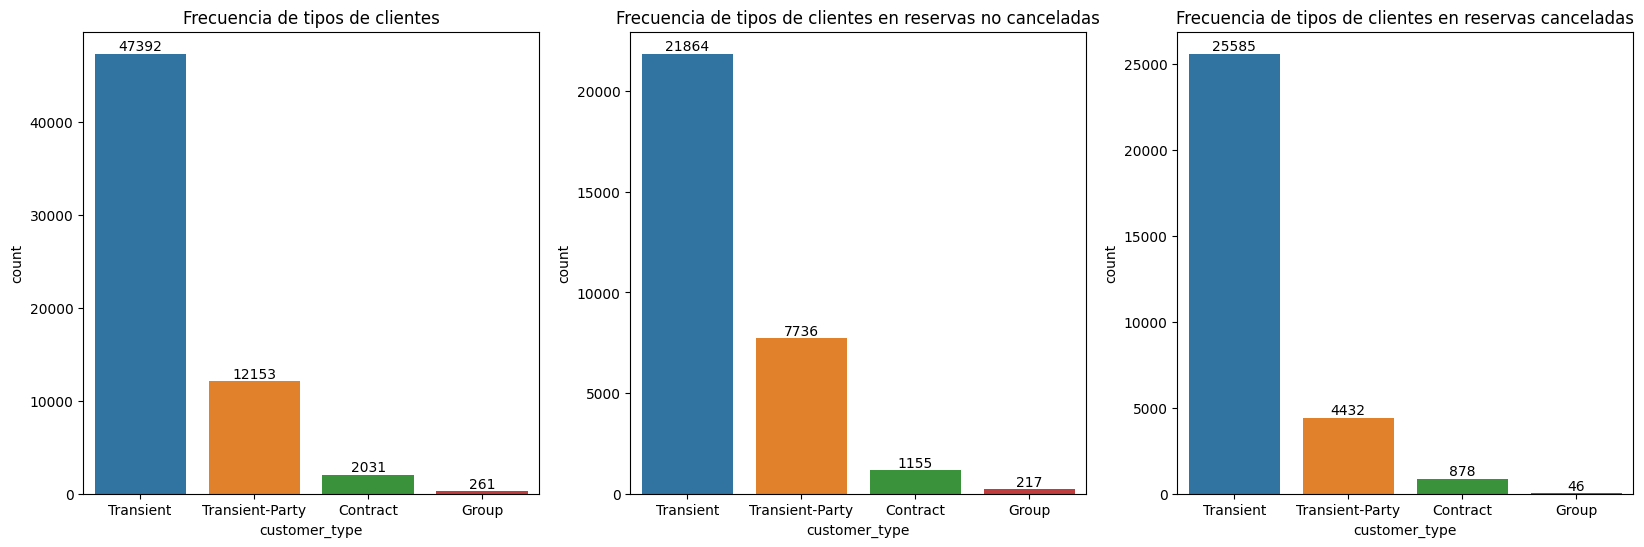

In [53]:
ig, ax = plt.subplots(1, 3, figsize = (20, 6))

sns00 = sns.countplot(data = df, x = "customer_type",ax= ax[0])
for label in sns00.containers:
    sns00.bar_label(label)

sns01 = sns.countplot(data = df_no_cancelado, x = "customer_type",ax= ax[1])
for label in sns01.containers:
    sns01.bar_label(label)
    
sns02 = sns.countplot(data = df_cancelado, x = "customer_type",ax= ax[2])
for label in sns02.containers:
    sns02.bar_label(label)

ax[0].set_title('Frecuencia de tipos de clientes')
ax[1].set_title('Frecuencia de tipos de clientes en reservas no canceladas')
ax[2].set_title('Frecuencia de tipos de clientes en reservas canceladas')

plt.show()

Comparando los graficos 'Frecuencia de tipos de clientes en reservas no canceladas' y 'Frecuencia de tipos de clientes en reservas canceladas' notamos que se cancelan en menor proporcion aquellas reservas que no tienen como tipo de cliente transient.
Para el caso de los clientes de tipo transient-party, de un total de 12167 no se cancelaron 7735 (63.6%) y se cancelaron solo 4432 (36.4%).
para el case de los clientes de tipo contract, de un total de 2033 no se cancelaron 1155 (56.8%) y se cancelaron solo 878 (43.2%).
Para el caso de los clientes de tipo group, de un total de 263 no se cancelaron 217 (82,5%) y se cancelaron solo 46 (17.5%).
***

26. **adr:** Esta variable cuantitativa de tipo numerica indica el valor promedio del dia de hospedaje calculado como el 
     importe total dividido por la cantidad de dias.  
    - *Moda:* 62.0.
    - *Media:* 102.3.
    - *Mediana:* 95.0.

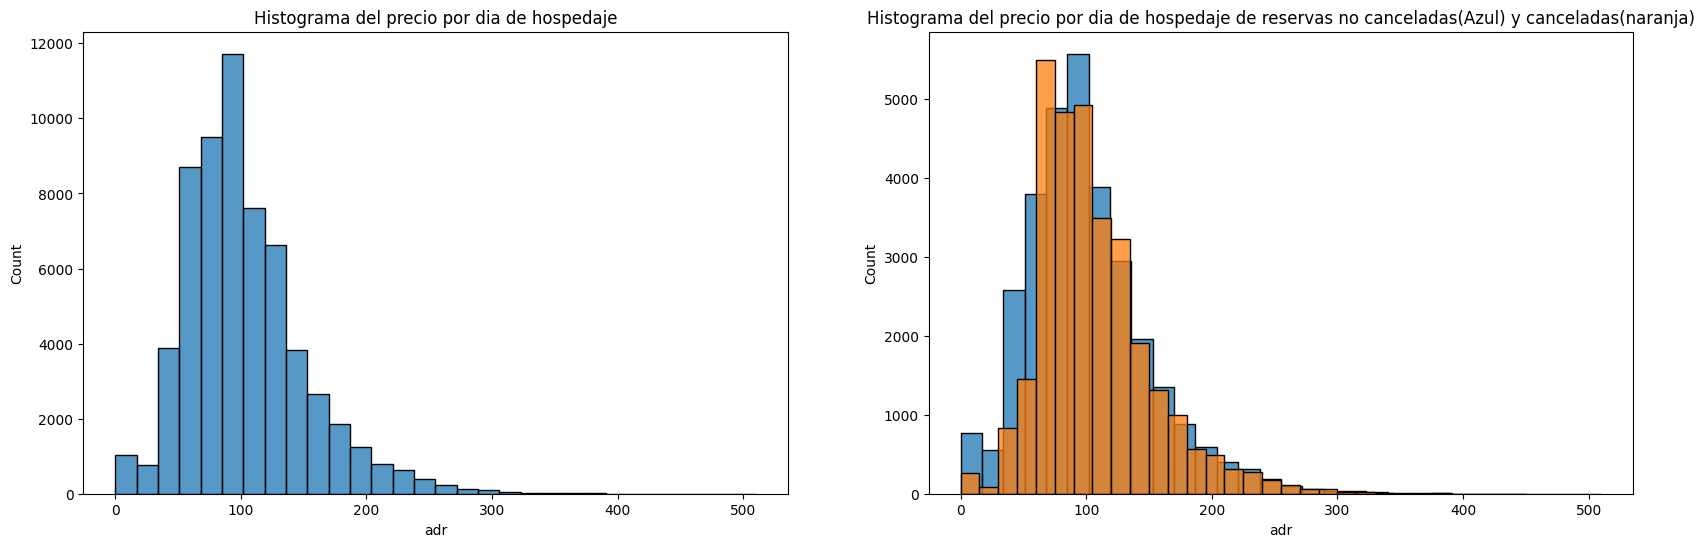

In [60]:
#Elimino 1 unico registro, donde el ADR resulta negativo
df.drop(df[(df['adr'] < 0)].index, inplace=True)

df_cancelado = df[df.is_canceled == 1]
df_no_cancelado = df[df.is_canceled == 0]

ig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.histplot(df, x = 'adr', ax = ax[0], bins = 30)
sns.histplot(df_no_cancelado, x = 'adr', ax = ax[1], bins = 30)
sns.histplot(df_cancelado, x = 'adr', ax = ax[1], bins = 30)

ax[0].set_title('Histograma del precio por dia de hospedaje')
ax[1].set_title('Histograma del precio por dia de hospedaje de reservas no canceladas(Azul) y canceladas(naranja)')

plt.show()

Notamos que aquellas reservas que fueron canceladas tienden a tener menores precios por dias de hospedaje que aquellas que no fueronn canceladas. Se elimino un valor atipico donde el ADR resulto negativo. 
***

27. **required_car_parking_spaces:** Esta variable cuantitativa indica la cantidad de espacios para autos reservados por el cliente 
    - *Moda:* 0.
    - *Media:* 0.05.
    - *Mediana:* 0.

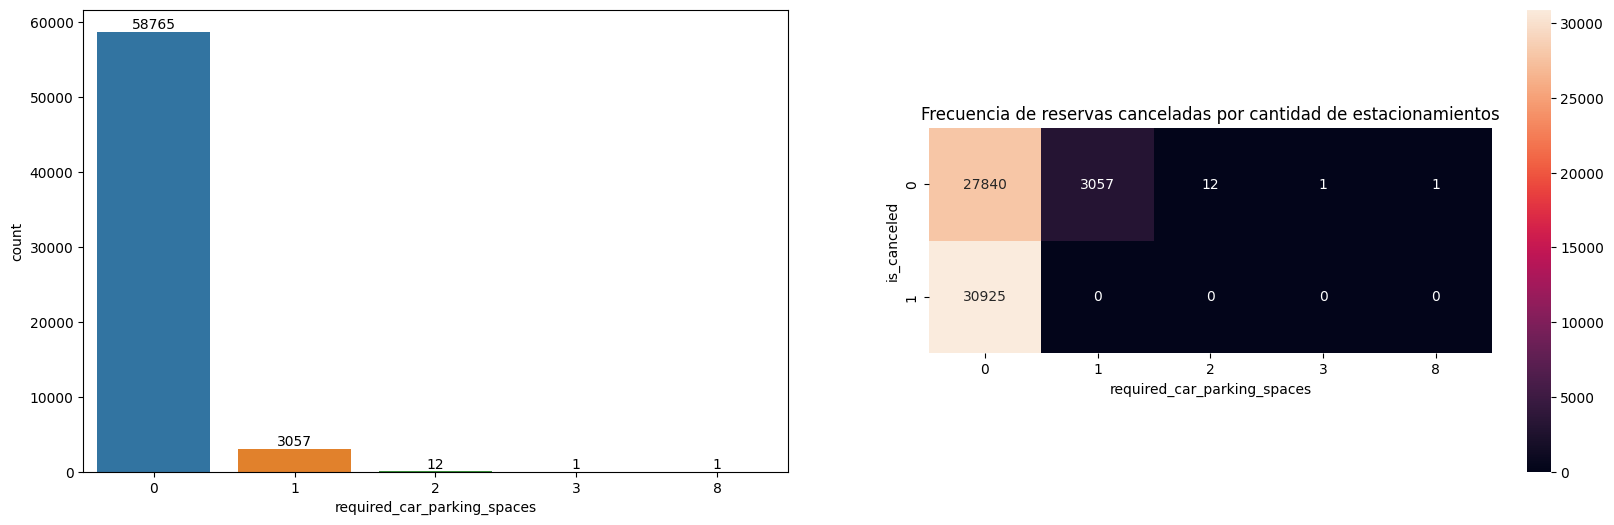

In [61]:
ig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns00 = sns.countplot(data = df, x = 'required_car_parking_spaces', ax = ax[0])
for label in sns00.containers:
    sns00.bar_label(label)

tabla_estacionamientos = pd.crosstab(df['is_canceled'], df['required_car_parking_spaces'])
ax[1].set_title('Frecuencia de reservas canceladas por cantidad de estacionamientos')

sns.heatmap(tabla_estacionamientos, annot = True, square = True, ax = ax[1], fmt='g')

plt.show()

Notamos que ninguna de las reservas que fueron canceladas reservaron un lugar de estacionamiento.
***

28. **total_of_special_requests:** Esta variable de tipo cuantitativa indica la cantidad de pedidos adicionales realizados por el 
     cliente
    - *Moda:* 0.
    - *Media:* 0.5.
    - *Mediana:* 0.

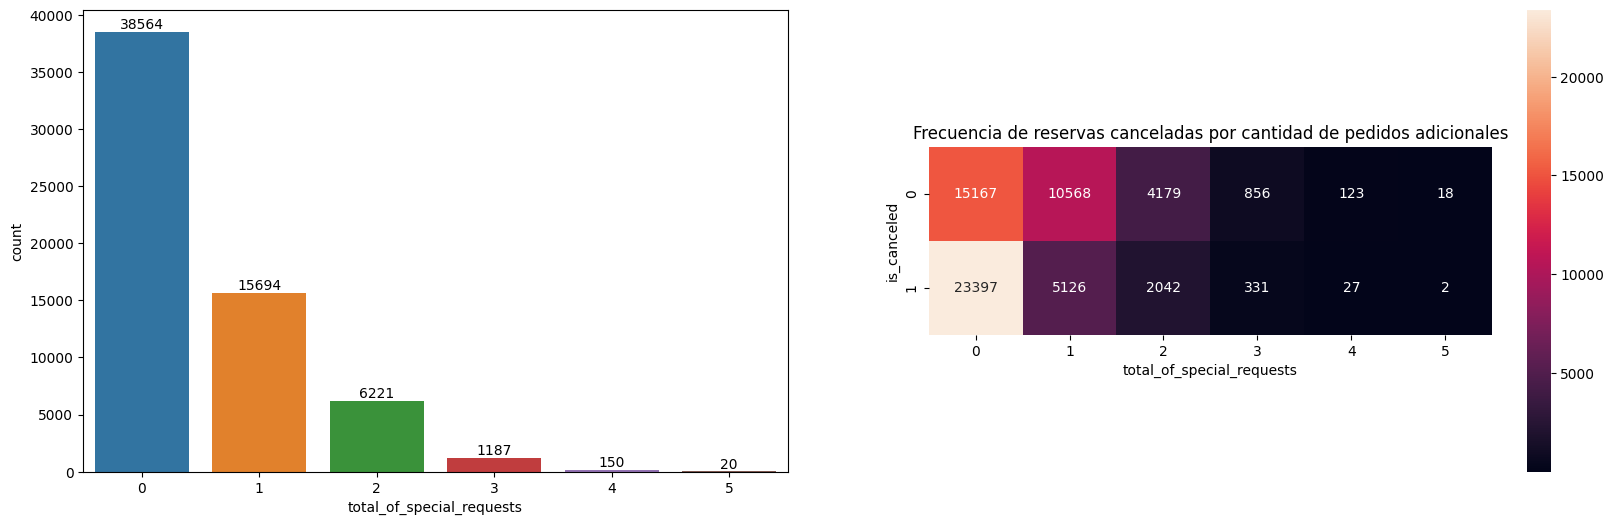

In [63]:
ig, ax = plt.subplots(1, 2, figsize = (20, 6))

sns00 = sns.countplot(data = df, x = 'total_of_special_requests', ax = ax[0])
for label in sns00.containers:
    sns00.bar_label(label)

tabla_adicionales = pd.crosstab(df['is_canceled'], df['total_of_special_requests'])
ax[1].set_title('Frecuencia de reservas canceladas por cantidad de pedidos adicionales')

sns.heatmap(tabla_adicionales, annot = True, square = True, ax = ax[1], fmt='g')

plt.show()

Notames que las reservas con mayor cantidad de pedidos especiales tienden a no ser canceladas en mayor proporcion.
Para las reservas con 1 pedido adicional, de un total de 15706 no se cancelaron 10578 (67.3%) y se cancelaron 2042 (32.6%).
Con 2 pedidos adicionales, de un total de 6227 no se cancelaron 4285 (67.2%) y se cancelaron 2042 (32.8%).
Con 3 pedidos adicionales, de un total de 1188 no se cancelaron 857 (72.1%) y se cancelaron 331 (27.9%).
Con 4 pedidos adicionales, de un total de 150 no se cancelaron 123 (82%.0) y se cancelaron 27 (18%).
Con 5 pedidos adicionales, de un total de 20 no se cancelaron 18 (95.0%) y se cancelaron 2 (5.0%).
Notamos tambien que a mayor cantidad de pedidos adicionales es mayor el porcentaje de reservas que no fueron canceladas.
***

29. **is_canceled:** Esta variable binaria indica si la reserva fue cancelada (1) o no (0).
    - *0:* No cancelada. Aparece en 30972 (50%) de los registros.
    - *1:* Cancelada. Aparece en 30941 (50%) de los registros.

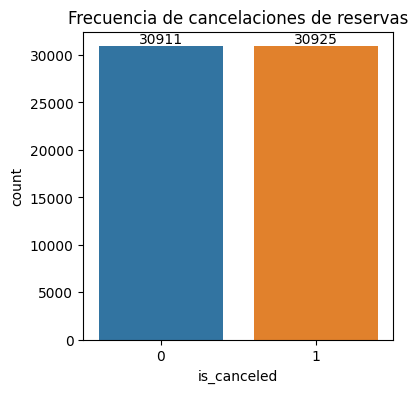

In [65]:
ig, ax = plt.subplots(1, 1, figsize = (4, 4))

a = sns.countplot(data = df, x = "is_canceled", ax = ax)
for label in a.containers:
    a.bar_label(label)

ax.set_title('Frecuencia de cancelaciones de reservas')

plt.show()

Notamos que estan canceladas aproximadamente el 50% de las reservas.
***

30. **id:** Variable alfanumerica no relacionada con el dominio del problema, sus datos fueron ofuscados para mantener la prividad de los clientes.
***

31. **reservation_status_date:** Variable no necesaria para el analisis segun la catedra.
***

Descartamos ahora todas las variables que consideramos no necesarias para el análisis.

In [39]:
df = df.drop(columns=['reservation_status_date', 'meal', 'booking_changes'])

Hacemos un mapa de calor entre las variables que consideramos necesarias para el análisis, para ver la correlación entre ellas.

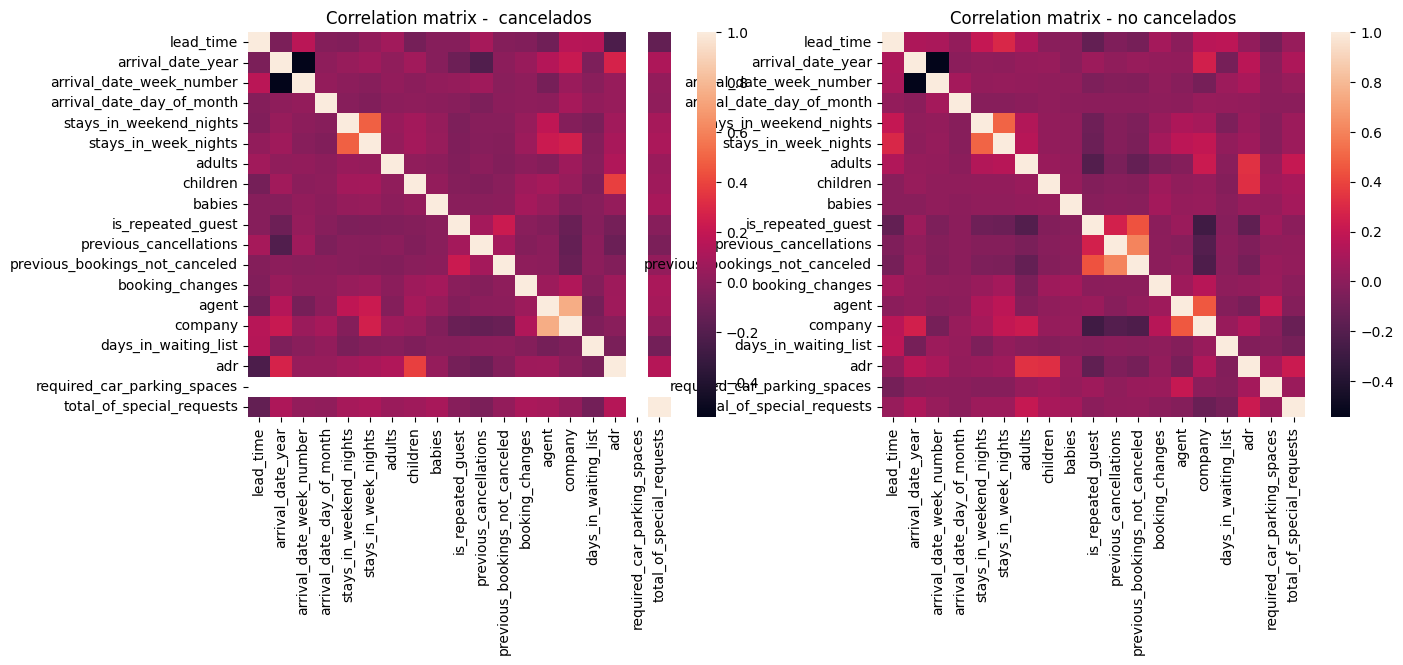

In [40]:
corr_can = df_cancelado.drop("is_canceled", axis=1).corr(numeric_only=True)
corr_no_can = df_no_cancelado.drop("is_canceled", axis=1).corr(numeric_only=True)

fig, ax = plt.subplots(1, 2, figsize=(15,5))

sns.heatmap(corr_can, 
            annot=False,
            ax=ax[0])
ax[0].set_title('Correlation matrix -  cancelados')

sns.heatmap(corr_no_can, 
            annot=False,
            ax=ax[1])
ax[1].set_title('Correlation matrix - no cancelados')

plt.show()